
📊 Estatísticas - Ano


count     346.0
mean     2024.0
std         0.0
min      2024.0
25%      2024.0
50%      2024.0
75%      2024.0
max      2024.0
Name: ano, dtype: float64


📊 Estatísticas - Mês


count    346.000000
mean       3.500000
std        1.718189
min        1.000000
25%        2.000000
50%        3.500000
75%        5.000000
max        6.000000
Name: mes, dtype: float64


📊 Estatísticas - Total Entrada


count     346.000000
mean      514.554913
std       306.505472
min         4.000000
25%       294.500000
50%       465.000000
75%       688.250000
max      1682.000000
Name: total_entrada, dtype: float64

,nome_centro_distribuicao,codigo_produto,ano,mes,total_entrada
0,CD Blumenau,P1004,2024.0,1.0,691
1,CD Blumenau,P1005,2024.0,1.0,363
2,CD Blumenau,P1001,2024.0,1.0,236
3,CD Blumenau,P1003,2024.0,1.0,219
4,CD Blumenau,P1002,2024.0,1.0,212



📊 Estatísticas - Ano


count     346.0
mean     2024.0
std         0.0
min      2024.0
25%      2024.0
50%      2024.0
75%      2024.0
max      2024.0
Name: ano, dtype: float64


📊 Estatísticas - Mês


count    346.000000
mean       3.500000
std        1.718189
min        1.000000
25%        2.000000
50%        3.500000
75%        5.000000
max        6.000000
Name: mes, dtype: float64


📊 Estatísticas - Total Entrada


count     346.000000
mean      514.554913
std       306.505472
min         4.000000
25%       294.500000
50%       465.000000
75%       688.250000
max      1682.000000
Name: total_entrada, dtype: float64

📌 rank
📌 Ranking de Centros por Volume de Entrada


,nome_centro_distribuicao,total_entrada
3,CD Florianópolis,20192
7,CD Lages,19787
5,CD Jaraguá do Sul,19653
8,CD São José,18329
6,CD Joinville,18096
4,CD Itajaí,17947
0,CD Blumenau,17485
9,CD Tubarão,16052
2,CD Criciúma,15402
1,CD Chapecó,15093


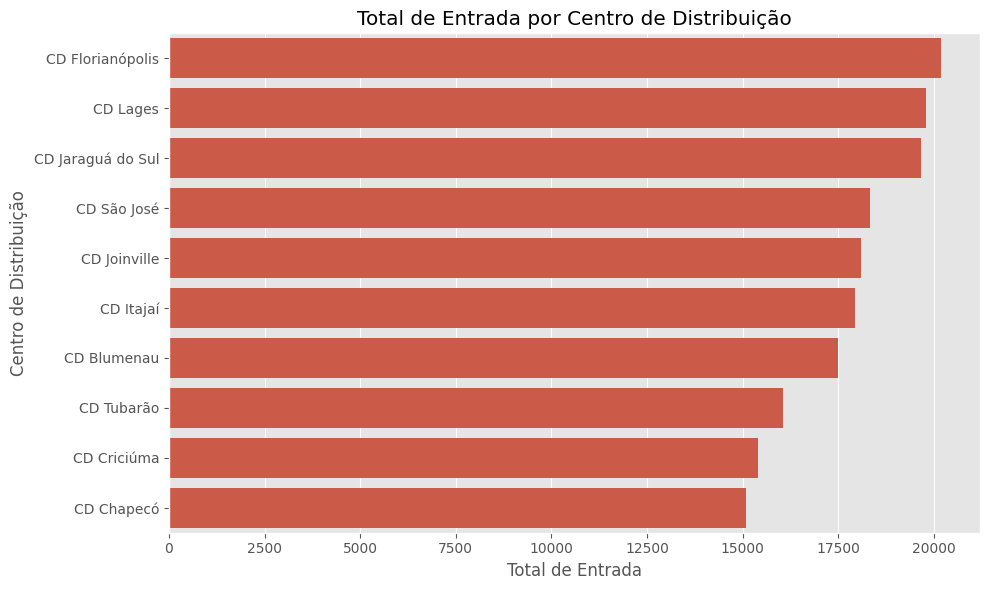

📌 Ranking de Produtos por Volume de Entrada


,codigo_produto,total_entrada
4,P1005,32447
2,P1003,31651
1,P1002,30202
3,P1004,29180
0,P1001,28772
5,P1006,25784


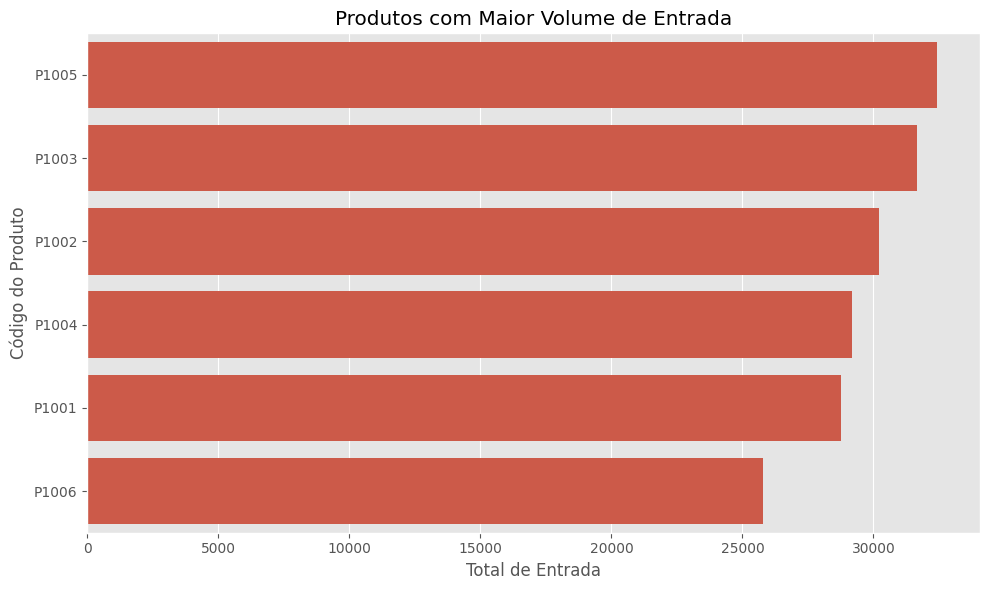

,ano,mes,total_entrada
0,2024.0,1.0,30478
1,2024.0,2.0,26879
2,2024.0,3.0,31849
3,2024.0,4.0,29827
4,2024.0,5.0,27827
5,2024.0,6.0,31176


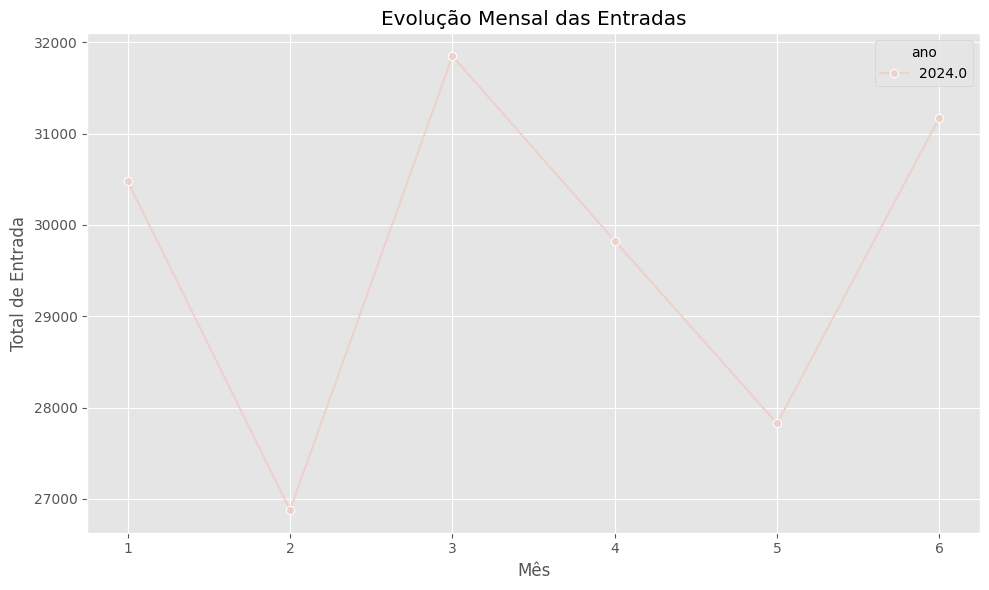

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path


BASE_DIR = Path().resolve().parent

df = pd.read_csv(BASE_DIR / "data" / "output" / "consulta.csv", sep=";")
df2 = pd.read_csv(BASE_DIR / "data" / "output" / "consulta2.csv", sep=";")


plt.style.use("ggplot")
# Visualizar as primeiras linhas
print("\n📊 Estatísticas - Ano")
display(df['ano'].describe())

print("\n📊 Estatísticas - Mês")
display(df['mes'].describe())

print("\n📊 Estatísticas - Total Entrada")
display(df['total_entrada'].describe())

display(df.head())

mov = df['total_entrada'].values

media = np.mean(mov)
variancia = np.var(mov)
desvio = np.std(mov)


print("\n📊 Estatísticas - Ano")
display(df['ano'].describe())

print("\n📊 Estatísticas - Mês")
display(df['mes'].describe())

print("\n📊 Estatísticas - Total Entrada")
display(df['total_entrada'].describe())


print("📌 rank")
ranking_centros = (
    df.groupby('nome_centro_distribuicao')['total_entrada']
    .sum()
    .reset_index()
    .sort_values(by='total_entrada', ascending=False)
)

print("📌 Ranking de Centros por Volume de Entrada")
display(ranking_centros)

plt.figure(figsize=(10,6))
sns.barplot(
    data=ranking_centros,
    x='total_entrada',
    y='nome_centro_distribuicao'
)

plt.title("Total de Entrada por Centro de Distribuição")
plt.xlabel("Total de Entrada")
plt.ylabel("Centro de Distribuição")
plt.tight_layout()
plt.show()




ranking_produtos = (
    df.groupby('codigo_produto')['total_entrada']
    .sum()
    .reset_index()
    .sort_values(by='total_entrada', ascending=False)
)

print("📌 Ranking de Produtos por Volume de Entrada")
display(ranking_produtos)

plt.figure(figsize=(10,6))
sns.barplot(
    data=ranking_produtos,
    x='total_entrada',
    y='codigo_produto'
)

plt.title("Produtos com Maior Volume de Entrada")
plt.xlabel("Total de Entrada")
plt.ylabel("Código do Produto")
plt.tight_layout()
plt.show()

entrada_por_mes = (
    df.groupby(['ano','mes'])['total_entrada']
    .sum()
    .reset_index()
)

display(entrada_por_mes)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=entrada_por_mes,
    x='mes',
    y='total_entrada',
    hue='ano',
    marker='o'
)

plt.title("Evolução Mensal das Entradas")
plt.xlabel("Mês")
plt.ylabel("Total de Entrada")
plt.tight_layout()
plt.show()


